# MongoDB -  Consultas

Autores - João Pedro da S. Lima, Pedro Henrique A. Cardoso

Este notebook contém exemplos de consultas que podem ser feitas no MongoDB para avaliarmos nossos resultados.

## Importando biblioteca e conectando ao cliente

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/joao/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# Imports iniciais
import pymongo

# Imports para ajudar na visualização
from pprint import pprint

# Conectando ao cliente local na port 27017
client = pymongo.MongoClient('localhost',27017)

In [3]:
db = client.mongo_db

## Exemplos de consultas

Começaremos com algumas consultas simples

**Consulta A.1:** Buscar todos os resultados de um modelo treinado em uma determinada base

In [4]:
cursor = db.doc_table.find({"database" : "boston"},
                           {"name" : 1, "params" : 1}).limit(3)

for doc in cursor:
    pprint(doc)

{'_id': ObjectId('6083b75e98e01f8c039f551d'),
 'name': 'SVR',
 'params': {'C': 1.0,
            'cache_size': 200,
            'coef0': 0.0,
            'degree': 2,
            'epsilon': 0.1,
            'gamma': 'auto_deprecated',
            'kernel': 'linear',
            'max_iter': -1,
            'shrinking': True,
            'tol': 0.001,
            'verbose': False}}
{'_id': ObjectId('6083b7805ee059cff85aba53'),
 'name': 'SVR',
 'params': {'C': 0.001,
            'cache_size': 200,
            'coef0': 0.0,
            'degree': 2,
            'epsilon': 0.1,
            'gamma': 'auto_deprecated',
            'kernel': 'poly',
            'max_iter': -1,
            'shrinking': True,
            'tol': 0.001,
            'verbose': False}}
{'_id': ObjectId('6083b7cb5ee059cff85aba56'),
 'name': 'SVR',
 'params': {'C': 10,
            'cache_size': 200,
            'coef0': 0.0,
            'degree': 2,
            'epsilon': 0.1,
            'gamma': 'auto_deprecated',
   

**Consulta A.2:** Buscar modelos por nome

In [5]:
cursor = db.doc_table.find({
                            "$or" : [
                                     {"name" : "RandomForestRegressor"},
                                     {"name" : "Ridge"}
                                    ]
                           }, 
                           {"name" : 1, "scores" : 1}).limit(3)

for doc in cursor:
        pprint(doc)

{'_id': ObjectId('6083bc7b779724d204c70a0d'),
 'name': 'RandomForestRegressor',
 'scores': {'fit_time': 0.001967012882232666,
            'score_time': 0.0007674098014831543,
            'test_neg_mean_squared_error': -32.088757655293094,
            'test_r2': 0.3627544928658441,
            'train_neg_mean_squared_error': -6.925298569643106,
            'train_r2': 0.9159931323778359}}
{'_id': ObjectId('6083bc7b779724d204c70a0e'),
 'name': 'RandomForestRegressor',
 'scores': {'fit_time': 0.02811962366104126,
            'score_time': 0.0027168989181518555,
            'test_neg_mean_squared_error': -22.780824161042368,
            'test_r2': 0.5562008318433966,
            'train_neg_mean_squared_error': -1.9608386963616165,
            'train_r2': 0.9759755996977673}}
{'_id': ObjectId('6083bc83779724d204c70a10'),
 'name': 'RandomForestRegressor',
 'scores': {'fit_time': 1.478890061378479,
            'score_time': 0.07430434226989746,
            'test_neg_mean_squared_error': -21.6

**Consulta A.3:** Buscar pela maior pontuação em uma determinada métrica

In [6]:
#metrica : test r2

cursor = db.doc_table.find({
                            "scores.test_r2":{"$exists":True}
                           }, 
                           {"name":1, 
                            "_id":0, 
                            "scores":{"test_r2":1}
                           }
                          ).limit(1)

cursor = cursor.sort("scores.test_r2", -1)
for doc in cursor:
        pprint(doc)

{'name': 'RandomForestRegressor', 'scores': {'test_r2': 0.6050912044057074}}


In [7]:
#metrica : test accuracy

cursor = db.doc_table.find({
                            "scores.test_accuracy":{"$exists":True}
                           }, 
                           {
                            "name":1, 
                            "_id":0, 
                            "scores":{"test_accuracy":1}
                           }
                          ).limit(1)

cursor = cursor.sort("scores.test_accuracy", -1)
for doc in cursor:
        pprint(doc)

{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9732905982905983}}


**Consulta A.4:** Buscar pela maior pontuação em alguma métrica em uma determinada base

In [8]:
#database : boston
#metrica : test_r2

cursor = db.doc_table.find(
                           {
                            "database": "boston"
                           },
                           {
                            "name" : 1, 
                            "_id" : 0, 
                            "database": 1, 
                            "scores" :{"test_r2":1}
                           }
                          )

cursor = cursor.sort("scores.test_r2", -1).limit(1)
for doc in cursor:
        pprint(doc)

{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.6050912044057074}}


**Consulta A.5:** Contar quantos modelos são avaliados com uma determinada métrica

In [9]:
cursor = db.doc_table.find(
                           {
                               "scores.test_accuracy":{"$exists":True}
                           }
                          ).limit(3)
cont = cursor.count()
print ('Número de documentos avaliados com ACURÁCIA no TESTE:', cont)

Número de documentos avaliados com ACURÁCIA no TESTE: 1221


/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


**Consulta A.6:** Retornar os modelos com um determinado nome que foram treinados em uma determinada base

In [41]:
#nome : Ridge
#database : boston

cursor = db.doc_table.find(
                           {
                            "database":"boston", 
                            "name":"Ridge"
                           },
                           {
                            "name" : 1, 
                            "_id" : 0,
                            "database": 1, 
                            "scores" : 1
                           }
                          ).limit(3)

for doc in cursor:
        pprint(doc)

{'database': 'boston',
 'name': 'Ridge',
 'scores': {'fit_time': 0.010999202728271484,
            'score_time': 0.0011339783668518066,
            'test_neg_mean_squared_error': -40.75210850730088,
            'test_r2': 0.14851973789321776,
            'train_neg_mean_squared_error': -22.792717532079457,
            'train_r2': 0.7217296061961568}}
{'database': 'boston',
 'name': 'Ridge',
 'scores': {'fit_time': 0.0011656880378723145,
            'score_time': 0.0012121200561523438,
            'test_neg_mean_squared_error': -40.75210850730088,
            'test_r2': 0.14851973789321776,
            'train_neg_mean_squared_error': -22.792717532079457,
            'train_r2': 0.7217296061961568}}
{'database': 'boston',
 'name': 'Ridge',
 'scores': {'fit_time': 0.0010777115821838379,
            'score_time': 0.0011426806449890137,
            'test_neg_mean_squared_error': -40.75210850730088,
            'test_r2': 0.14851973789321776,
            'train_neg_mean_squared_error': -22.7

**Consulta A.7:** Encontrar modelos com métrica em um intervalo específico

In [11]:
#ENCONTRAR MODELOS COM ALGUMA MÉTRICA EM UM INTERVALO ESPECÍFICO
#metrica : test_r2
#intervalo : 0.3 < x < 0.5


cursor = db.doc_table.find(
                           {
                            "$and":[
                                    {"scores.test_r2":{"$lt":0.5}},
                                    {"scores.test_r2":{"$gt":0.3}}
                                   ]
                           },
                           {
                            "name":1, 
                            "_id" : 0,
                            "database": 1, 
                            "scores":{"test_r2" : 1}
                           }
                          )

cursor = cursor.limit(10)
for doc in cursor:
        pprint(doc)


{'database': 'diabetes',
 'name': 'SVR',
 'scores': {'test_r2': 0.43983215751749444}}
{'database': 'boston',
 'name': 'SVR',
 'scores': {'test_r2': 0.42265768153125205}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.3627544928658441}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.36526807869555084}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.4187578441307834}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.3601357240868527}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.367484203925967}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.30935241962808413}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.48688926798334053}}
{'database': 'boston',
 'name': 'RandomForestRegressor',
 'scores': {'test_r2': 0.40361383834821796}}


## Consultas aprofundadas

Agora, demonstraremos como as consultas aggregate do mongo podem nos dar uma boa visão dos modelos avaliados

**Consulta B.1:** Contar quantos modelos de cada tipo existem

In [13]:
cursor = db.doc_table.aggregate(
                                [
                                    {
                                        "$group":{
                                                  "_id":"$name", 
                                                  "total": {"$sum":1}
                                                 }
                                    }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'Ridge', 'total': 96}
{'_id': 'SVR', 'total': 20}
{'_id': 'RandomForestRegressor', 'total': 1152}
{'_id': 'LogisticRegression', 'total': 69}
{'_id': 'RandomForestClassifier', 'total': 1152}


Buscando modelos que não estão em Overfitting:

**Consulta B.2:** Retornar todos os modelos cuja acurácia de treino supera a acurácia de teste em, no máximo, 10%

In [12]:
cursor = db.doc_table.aggregate([
                                 {
                                     "$match":{"scores.test_accuracy":{"$exists":True} },
                                 },
                                 {
                                     "$set":{
                                             "comp":{
                                                     "$cmp":[
                                                              {
                                                                "$subtract":["$scores.test_accuracy", 
                                                                             "$scores.train_accuracy"]
                                                              },
                                                              0.1
                                                            ]
                                                     }
                                            }
                                 },
                                 {
                                     "$match":{"comp":-1}
                                 },
                                 {
                                     "$project":{
                                                 "scores":{
                                                           "test_accuracy":1, 
                                                           "train_accuracy":1
                                                          },
                                                 "_id":0,
                                                 "name":1
                                                }
                                 },
                                 {
                                     "$sample":{"size":5}
                                 }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9599358974358974,
            'train_accuracy': 0.9755808440018966}}
{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9465811965811965,
            'train_accuracy': 0.9688833570412518}}
{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9051881217374175,
            'train_accuracy': 0.9256069202097833}}
{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9668803418803418,
            'train_accuracy': 0.9755808440018966}}
{'name': 'RandomForestClassifier',
 'scores': {'test_accuracy': 0.9396367521367521,
            'train_accuracy': 0.9600521574205785}}


**Consulta B.3:** Contar quantos modelos foram treinados em uma base específica

In [14]:
#database : boston

cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match":{
                                               "database": "boston"
                                              }
                                 },
                                 {
                                     "$group":{
                                               "_id":"$database", 
                                               "total": {"$sum": 1}
                                              }
                                 }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'boston', 'total': 634}


**Consulta B.4:** Retornar o modelo com maior pontuação média em uma determinada métrica

In [15]:
#metrica : test_r2

cursor = db.doc_table.aggregate(
                                [
                                  {
                                      "$match":{
                                                "scores.test_r2": {"$exists": True}
                                               }
                                  },
                                  {
                                      "$group":{
                                                "_id":"$name", 
                                                "avgAmount":{"$avg":"$scores.test_r2"}
                                               }
                                  }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'RandomForestRegressor', 'avgAmount': 0.4060676304783088}
{'_id': 'Ridge', 'avgAmount': -0.9006692195839653}
{'_id': 'SVR', 'avgAmount': -1559803.8107531858}


Um problema que ocorreu durante o a avaliação da métrica $r^2$ foram os erros numéricos, o que nos deixa com valores negativos inconsistentes.

Vamos refazer a busca anterior removendo esses valores

In [16]:
#RETIRANDO VALORES NEGATIVOS

cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match": {
                                                "scores.test_r2": {"$gt": 0}
                                               }
                                 },
                                 {
                                     "$match": {
                                                "scores.test_r2": {"$exists": True}
                                               }
                                 },
                                 {
                                     "$group": {
                                                "_id":"$name", 
                                                "avgAmount": {"$avg":"$scores.test_r2"}
                                               }
                                 },
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'RandomForestRegressor', 'avgAmount': 0.42727512260276934}
{'_id': 'Ridge', 'avgAmount': 0.24422183244193776}
{'_id': 'SVR', 'avgAmount': 0.29102535883886943}


**Consulta B.5:** Retornar os valores mínimos, máximos, a média e o desvio padrão de alguma métrica

In [17]:
#metrica : test_neg_mean_squared_error

cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match" :{"scores.test_neg_mean_squared_error": {"$exists": True}}
                                 },
                                 {
                                     "$group" :{
                                                "_id":"total", 
                                                "avg": {"$avg":"$scores.test_neg_mean_squared_error"}, 
                                                "max": {"$max":"$scores.test_neg_mean_squared_error"},
                                                "min": {"$min":"$scores.test_neg_mean_squared_error"},
                                                "std": {"$stdDevPop":"$scores.test_neg_mean_squared_error"}
                                               }
                                 },
                                 {
                                    "$project":{
                                                "avg": 1, 
                                                "max": 1, 
                                                "min": 1, 
                                                "std":1
                                               }
                                 }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'total',
 'avg': -908332.4698882014,
 'max': -20.419178191577366,
 'min': -1142260453.7588298,
 'std': 32065486.05675491}


**Consulta B.6:** Retornar os valores mínimos, máximos, a média e o desvio padrão de alguma métrica por modelo e por base de dados

In [18]:
#metrica : test_neg_mean_squared_error

cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match" :{
                                                "scores.test_neg_mean_squared_error": {"$exists": True}
                                               }
                                 },
                                 {
                                     "$group" :{
                                                "_id":["$database","$name"], 
                                                "avg": {"$avg":"$scores.test_neg_mean_squared_error"}, 
                                                "max": {"$max":"$scores.test_neg_mean_squared_error"},
                                                "min": {"$min":"$scores.test_neg_mean_squared_error"},
                                                "std": {"$stdDevPop":"$scores.test_neg_mean_squared_error"}
                                               }
                                 },
                                 {
                                     "$sort": {
                                               "_id.0":1
                                              }
                                 },
                                 {
                                    "$project":{
                                                "avg": 1, 
                                                "max": 1, 
                                                "min": 1, 
                                                "std":1
                                               }
                                 }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': ['boston', 'Ridge'],
 'avg': -48.40339477593199,
 'max': -34.229867008959566,
 'min': -101.60909429226959,
 'std': 18.128151696834493}
{'_id': ['boston', 'SVR'],
 'avg': -114870247.44852662,
 'max': -33.07617655784381,
 'min': -1142260453.7588298,
 'std': 342468419.2586792}
{'_id': ['boston', 'RandomForestRegressor'],
 'avg': -26.31886570627107,
 'max': -20.419178191577366,
 'min': -168.01638736149246,
 'std': 8.448814724156064}
{'_id': ['diabetes', 'RandomForestRegressor'],
 'avg': -3830.6074214904543,
 'max': -3203.1687026379736,
 'min': -7597.213229850096,
 'std': 909.7260952971394}
{'_id': ['diabetes', 'Ridge'],
 'avg': -16288.553563014204,
 'max': -2960.2471528820383,
 'min': -29072.15791231808,
 'std': 11972.41433638228}
{'_id': ['diabetes', 'SVR'],
 'avg': -5733.38575740771,
 'max': -3226.361600074065,
 'min': -6140.17000336499,
 'std': 886.1432589748243}


Escolher, de forma geral, o melhor modelo para uma base de dados:

**Consulta B.7:** Em cada base de dados, listar cada tipo de modelo treinado e suas respectivas pontuações médias em cada uma das métricas disponíveis do campo scores

In [19]:
cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$set":{
                                             "scoresArray": {"$objectToArray": "$scores"},
                                            }
                                 },
                                 {
                                     "$unwind":"$scoresArray"
                                 },
                                 {
                                     "$group":{
                                               "_id":{"database":"$database", 
                                                      "score":"$scoresArray.k", 
                                                      "name":"$name"},
                                               "avg":{ "$avg":"$scoresArray.v" },
                                              }
                                 },
                                 {
                                     "$set":{
                                             "database":"$_id.database",
                                             "metric":"$_id.score",
                                             "name":"$_id.name"
                                            }
                                 },
                                 {
                                     "$group":{
                                               "_id":{"database":"$database",
                                                      "name":"$name"},
                                               "scores":{ "$push":{"k":"$metric","v":"$avg"} }
                                              }
                                 },
                                 {
                                     "$set":{
                                             "scores":{"$arrayToObject": "$scores"}
                                             }
                                 },
                                 {
                                     "$group":{
                                               "_id":"$_id.database",
                                               "scores":{ "$push":{"scores":"$scores","name":"$_id.name"} }
                                              }
                                 },
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': 'boston',
 'scores': [{'name': 'SVR',
             'scores': {'fit_time': 140.90892934203148,
                        'score_time': 0.003196913003921509,
                        'test_neg_mean_squared_error': -114870247.44852662,
                        'test_r2': -3119607.637110291,
                        'train_neg_mean_squared_error': -31425632.124499857,
                        'train_r2': -389105.7175501409}},
            {'name': 'Ridge',
             'scores': {'fit_time': 0.0013974905014038086,
                        'score_time': 0.001092339555422465,
                        'test_neg_mean_squared_error': -48.40339477593199,
                        'test_r2': 0.01241057691548702,
                        'train_neg_mean_squared_error': -30.333858608661284,
                        'train_r2': 0.629250481574258}},
            {'name': 'RandomForestRegressor',
             'scores': {'fit_time': 0.3613734987253944,
                        'score_time': 0.0236759542798002

Encontrar o modelo com melhor desempenho:

**Consulta B.8:** Encontrar os melhores modelos em *acurácia de teste* nas bases que possuem acurácia e em *Erro Quadrático Médio Negativo* nas que possuem este campo

In [38]:
#metrica : test_neg_mean_squared_error

cursor = db.doc_table.aggregate(
                                [
                                 {
                                    "$set":{
                                            "test_neg_mean_squared_error":"$scores.test_neg_mean_squared_error",
                                            "test_accuracy":"$scores.test_accuracy"
                                           }
                                 },
                                 {
                                     "$set":{
                                             "score":{
                                                      "$cond":{
                                                               "if":{"$ne":["$test_accuracy", "$undefined"]},
                                                               "then":"test_accuracy",
                                                               "else":"test_neg_mean_squared_error"
                                                              }
                                                     },
                                             "value":{
                                                      "$cond":{
                                                               "if":{"$ne":["$test_accuracy", "$undefined"]},
                                                               "then":"$test_accuracy",
                                                               "else":"$test_neg_mean_squared_error"
                                                              }
                                                     }
                                            }
                                 },
                                 {
                                     "$sort":{
                                              "value":-1
                                             }
                                 },
                                 {
                                     "$group":{
                                               "_id":{"database":"$database", "score":"$score"},
                                               "bestModelName":{"$first":"$name"},
                                               "bestModelParams":{"$first":"$params"},
                                               "bestScore":{"$first":"$value"}
                                              }
                                 }
                                ]
                               )

for doc in cursor:
        pprint(doc)

{'_id': {'database': 'diabetes', 'score': 'test_neg_mean_squared_error'},
 'bestModelName': 'Ridge',
 'bestModelParams': {'alpha': 0.001,
                     'copy_X': True,
                     'fit_intercept': 1,
                     'max_iter': None,
                     'normalize': 0,
                     'random_state': None,
                     'solver': 'auto',
                     'tol': 0.001},
 'bestScore': -2960.2471528820383}
{'_id': {'database': 'iris', 'score': 'test_accuracy'},
 'bestModelName': 'RandomForestClassifier',
 'bestModelParams': {'bootstrap': True,
                     'class_weight': None,
                     'criterion': 'gini',
                     'max_depth': 10000,
                     'max_features': 'auto',
                     'max_leaf_nodes': 10000,
                     'min_impurity_decrease': 0.0,
                     'min_impurity_split': None,
                     'min_samples_leaf': 4,
                     'min_samples_split': 16,
        

## Plotando alguns gráficos

Nesta seção, nos dedicamos a estruturar consultas que nos ajudem a gerar gráficos de modo geral

In [42]:
import matplotlib.pyplot as plt


**C.1** Visualizar como o tempo de treino do modelo RandomForestRegressor varia com seu número de árvores

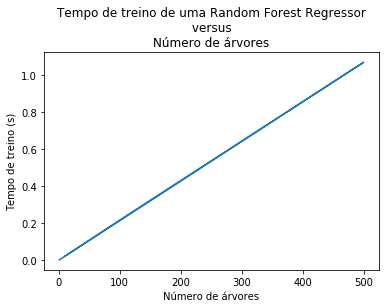

In [66]:
cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match": {
                                                "name":"RandomForestRegressor"
                                               }
                                 },
                                 {
                                     "$group": {
                                                "_id":"$params.n_estimators", 
                                                "fit_time":{"$avg":"$scores.fit_time"}
                                               }
                                 },
                                ]
                               )
list_cursor = list(cursor)
y = [ doc['fit_time'] for doc in list_cursor ]
x = [ doc['_id'] for doc in list_cursor ]

plt.plot(x,y)
plt.xlabel("Número de árvores")
plt.ylabel("Tempo de treino (s)")
plt.title("Tempo de treino de uma Random Forest Regressor\n versus \nNúmero de árvores")
plt.show()

**C.2** Plotar o histograma de acurácias de treino de um LogisticRegressor

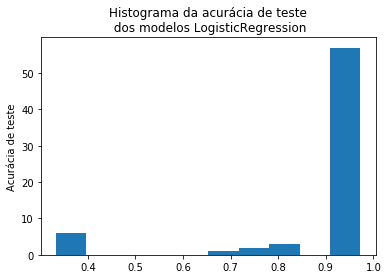

In [76]:
cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match": {
                                                "name":"LogisticRegression"
                                               }
                                 },
                                 {
                                     "$group": {
                                                "_id":"", 
                                                "test_accuracies":{"$push":"$scores.test_accuracy"}
                                               }
                                 },
                                ]
                               )

dist = list(cursor)[0]['test_accuracies']
plt.hist(dist)
plt.ylabel("Acurácia de teste")
plt.title("Histograma da acurácia de teste\n dos modelos LogisticRegression")
plt.show()

**C.3** Visualizar como varia o erro quadrático médio dos modelos treinados em uma base de dados com o tempo de treino

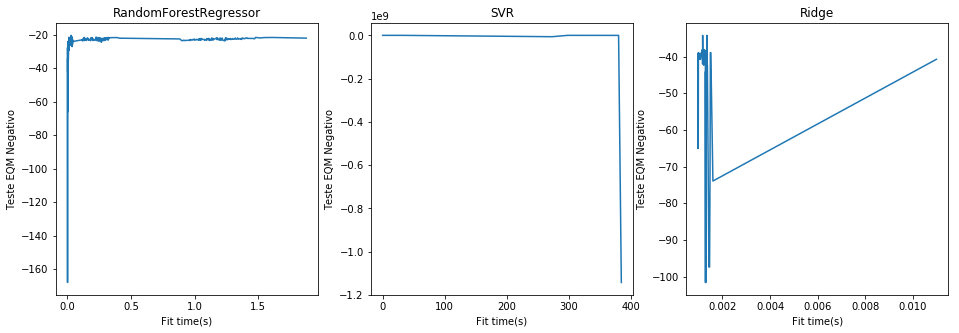

In [116]:
cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match": {
                                                "database":"boston"
                                               }
                                 },
                                 {
                                     "$sort":{
                                              "scores.fit_time":1
                                             }
                                 },
                                 {
                                     "$group": {
                                                "_id":{"database":"$database", "name":"$name"},
                                                "fit_times":{"$push":"$scores.fit_time"},
                                                "score":{"$push":"$scores.test_neg_mean_squared_error"},
                                               }
                                 },
                                ]
                               )
list_cursor = list(cursor)

fig, axs = plt.subplots(1, len(list_cursor), figsize=(16, 5) )

for i in range(len(list_cursor)):
    x = list_cursor[i]['fit_times']
    y = list_cursor[i]['score']
    axs[i].plot(x, y)
    axs[i].set_xlabel("Fit time(s)")
    axs[i].set_ylabel("Teste EQM Negativo")
    axs[i].set_title(list_cursor[i]["_id"]["name"])
plt.show()

**C.4** Visualizar como varia a acurácia de treino e acurácia de teste de uma LogistcRegression conforme o o valor de $log (C)$ varia

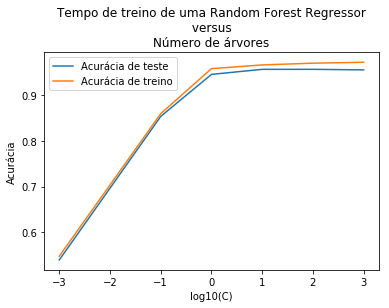

[{'_id': 0.001,
  'test_accuracies': 0.5392515348501264,
  'train_accuracies': 0.5474180049867566,
  'logC': -3.0},
 {'_id': 0.1,
  'test_accuracies': 0.8541288767961303,
  'train_accuracies': 0.8601167319191599,
  'logC': -1.0},
 {'_id': 1.0,
  'test_accuracies': 0.9462312270410861,
  'train_accuracies': 0.9587887258007961,
  'logC': 0.0},
 {'_id': 10,
  'test_accuracies': 0.9572814867709233,
  'train_accuracies': 0.966953892565153,
  'logC': 1.0},
 {'_id': 100,
  'test_accuracies': 0.9573321012581576,
  'train_accuracies': 0.9708238553858108,
  'logC': 2.0},
 {'_id': 1000,
  'test_accuracies': 0.9561119957246719,
  'train_accuracies': 0.9728604681461381,
  'logC': 3.0}]

In [129]:
cursor = db.doc_table.aggregate(
                                [
                                 {
                                     "$match": {
                                                "name":"LogisticRegression"
                                               }
                                 },
                                 
                                 {
                                     "$group": {
                                                "_id":"$params.C", 
                                                "test_accuracies":{"$avg":"$scores.test_accuracy"},
                                                "train_accuracies":{"$avg":"$scores.train_accuracy"},
                                               }
                                 },
                                 {
                                     "$sort":{
                                         "_id":1
                                     }
                                 },
                                 {
                                     "$project":{
                                         "logC":{"$log10":"$_id"},
                                         "test_accuracies":1,
                                         "train_accuracies":1
                                     }
                                 }
                                ]
                               )
list_cursor = list(cursor)
y1 = [ doc['test_accuracies'] for doc in list_cursor ]
y2 = [ doc['train_accuracies'] for doc in list_cursor ]
x = [ doc['logC'] for doc in list_cursor ]

plt.plot(x,y1, label="Acurácia de teste")
plt.plot(x,y2, label="Acurácia de treino")
plt.xlabel("log10(C)")
plt.ylabel("Acurácia")
plt.legend()
plt.title("Acurácias de treino e teste do modelo L")
plt.show()